In [26]:
from tensorflow import keras
from keras.models import Sequential
from keras import layers
from keras.preprocessing.text import Tokenizer
from keras.utils.data_utils import pad_sequences
import pandas as pd
import numpy as np


train_df = pd.read_csv('./data/train.csv')[:10000]
test_df = pd.read_csv('./data/test.csv')

print(train_df.isnull().sum())
train_df.shape

id           0
tid1         0
tid2         0
title1_en    0
title2_en    0
label        0
dtype: int64


(10000, 6)

In [27]:
import data

train_df["title1_en"] = train_df["title1_en"].apply(data.preprocess_text)
train_df["title2_en"] = train_df["title2_en"].apply(data.preprocess_text)
test_df["title1_en"] = test_df["title1_en"].apply(data.preprocess_text)
test_df["title2_en"] = test_df["title2_en"].apply(data.preprocess_text)

# Concatenate the two titles into a single string
train_df['text'] = train_df['title1_en'] + ' ' + train_df['title2_en']
test_df['text'] = test_df['title1_en'] + ' ' + test_df['title2_en']

label_dict = {'agreed': 0, 'disagreed': 1, 'unrelated': 2}
train_df['label_num'] = train_df['label'].apply(lambda x: label_dict[x])

max_features = 2000
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(train_df['text'])

# convert the text sequences to integer sequences
train_sequences = tokenizer.texts_to_sequences(train_df['text'].values)
# train_matrix = tokenizer.texts_to_matrix(train_df['text'].values, mode='tfidf')
# pad the sequences to have the same length
max_length = max([len(seq) for seq in train_sequences])
train_data = pad_sequences(train_sequences, maxlen=max_length)

train_labels = keras.utils.to_categorical(train_df['label_num'].values)

# print(max_features, train_matrix.shape, train_data.shape, len(tokenizer.word_index))

In [28]:
# Input for variable-length sequences of integers
inputs = keras.Input(shape=(None,), dtype="int32")
# Embed each integer in a 128-dimensional vector
x = layers.Embedding(max_features, 128)(inputs)
# Add 2 bidirectional LSTMs
x = layers.LSTM(64, return_sequences=True)(x)
x = layers.LSTM(64)(x)
# Add a classifier
outputs = layers.Dense(3, activation="softmax")(x)
model = keras.Model(inputs, outputs)
model.summary()


model.compile(keras.optimizers.SGD(0.001), "categorical_crossentropy", metrics=['accuracy'])
# model.compile("adam", "categorical_crossentropy", metrics=["accuracy"])
history = model.fit(train_data, train_labels, batch_size=128, epochs=10, validation_split=0.3)


Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, None)]            0         
                                                                 
 embedding_8 (Embedding)     (None, None, 128)         256000    
                                                                 
 lstm_12 (LSTM)              (None, None, 64)          49408     
                                                                 
 lstm_13 (LSTM)              (None, 64)                33024     
                                                                 
 dense_8 (Dense)             (None, 3)                 195       
                                                                 
Total params: 338,627
Trainable params: 338,627
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10


2023-04-23 18:00:47.209001: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-04-23 18:00:47.668204: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-04-23 18:00:48.029088: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-04-23 18:00:48.499520: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-04-23 18:00:49.091676: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


55/55 [==============================] - ETA: 0s - loss: 1.0810 - accuracy: 0.6211

2023-04-23 18:01:01.999333: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-04-23 18:01:02.155899: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-04-23 18:01:02.480228: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


55/55 [==============================] - 21s 291ms/step - loss: 1.0810 - accuracy: 0.6211 - val_loss: 1.0627 - val_accuracy: 0.6707
Epoch 2/10
55/55 [==============================] - 12s 213ms/step - loss: 1.0484 - accuracy: 0.6541 - val_loss: 1.0313 - val_accuracy: 0.6707
Epoch 3/10
55/55 [==============================] - 12s 210ms/step - loss: 1.0195 - accuracy: 0.6541 - val_loss: 1.0032 - val_accuracy: 0.6707
Epoch 4/10
55/55 [==============================] - 12s 212ms/step - loss: 0.9937 - accuracy: 0.6541 - val_loss: 0.9782 - val_accuracy: 0.6707
Epoch 5/10
55/55 [==============================] - 12s 219ms/step - loss: 0.9707 - accuracy: 0.6541 - val_loss: 0.9558 - val_accuracy: 0.6707
Epoch 6/10
55/55 [==============================] - 12s 211ms/step - loss: 0.9500 - accuracy: 0.6541 - val_loss: 0.9358 - val_accuracy: 0.6707
Epoch 7/10
55/55 [==============================] - 12s 210ms/step - loss: 0.9315 - accuracy: 0.6541 - val_loss: 0.9179 - val_accuracy: 0.6707
Epoch 8/10

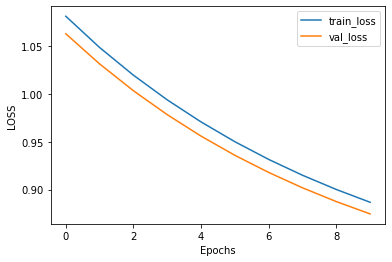

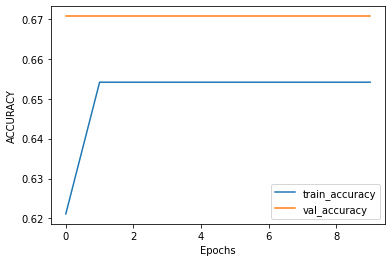

In [29]:
import plot
# Plot history
plot.plot_history(history, 'loss', 'val_loss')
plot.plot_history(history, 'accuracy', 'val_accuracy')
